In [41]:
#Importing libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from numpy import asarray


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
 

In [42]:
%store -r
stored_variables = dir()
dataframe_names = [var for var in stored_variables if isinstance(eval(var), pd.DataFrame)]
print(dataframe_names)

['ARIMA_results', 'ARIMA_static', 'ARIMA_walk_forward', 'DTresults', 'DecisionTree_roll', 'DecisionTree_static', 'DecisionTree_wf', 'ProphetResults', 'Prophet_static', 'Prophet_wf', 'RFresults', 'RandomForest_roll', 'RandomForest_static', 'RandomForest_wf', 'XGB_roll', 'XGB_static', 'XGB_wf', 'XGBresults', '_', '_10', '_11', '_12', '_13', '_14', '_15', '_17', '_18', '_23', '_24', '_25', '_26', '_27', '_28', '_29', '_3', '_30', '_31', '_32', '_33', '_34', '_35', '_37', '_38', '_4', '_5', '_6', '_7', '_8', '_9', '__', '___', 'combined_df', 'df_cleaned', 'series_lines_by_character_df', 'series_lines_clean_df', 'series_lines_raw_df']


### NOTE: THE FOLLOWING ARE ONLY METRICS FOR category A1 & A2 -  geschreddert in cluster [25, 24]

In [43]:
ARIMA_static

,mae,me,rmse,direction_accuracy,Model
0,15.497086,14.843453,17.982535,0.5,ARIMA_static


In [44]:
ARIMA_walk_forward

,mae,me,rmse,direction_accuracy,Model
0,8.888828,-0.133571,9.651584,0.375,ARIMA_walk_forward


In [45]:
DecisionTree_static

,mae,me,rmse,direction_accuracy,Model
0,10.617329,6.974694,11.533878,0.25,DecisionTree_static


In [46]:
DecisionTree_roll

,mae,me,rmse,direction_accuracy,Model
0,7.148119,3.527439,9.056628,0.375,DecisionTree_roll


In [47]:
DecisionTree_wf

,mae,me,rmse,direction_accuracy,Model
0,6.921115,1.779414,8.68358,0.625,DecisionTree_wf


In [48]:
RandomForest_static

,mae,me,rmse,direction_accuracy,Model
0,9.543498,6.935595,10.814334,0.375,RandomForest_static


In [49]:
RandomForest_roll

,mae,me,rmse,direction_accuracy,Model
0,6.893966,2.345931,8.555033,0.375,RandomForest_roll


In [50]:
RandomForest_wf

,mae,me,rmse,direction_accuracy,Model
0,7.234147,2.525658,8.732761,0.5,RandomForest_wf


In [51]:
XGB_static

,mae,me,rmse,direction_accuracy,Model
0,10.741105,7.736472,12.012174,0.375,XGB_static


In [52]:
XGB_roll

,mae,me,rmse,direction_accuracy,Model
0,6.623338,1.548795,7.974943,0.5,XGB_roll


In [53]:
XGB_wf

,mae,me,rmse,direction_accuracy,Model
0,6.92263,2.32837,8.226339,0.5,XGB_wf


In [54]:
Prophet_static

,mae,me,rmse,direction_accuracy,Model
0,8.468395,-8.00553,10.4144,0.5,Prophet_static


In [55]:
Prophet_wf

,mae,me,rmse,direction_accuracy,Model
0,6.264178,-4.487235,7.939459,0.5,Prophet_wf


In [56]:
# Add a new column to each dataframe to store the dataframe name
ARIMA_static['Model'] = 'ARIMA_static'
ARIMA_walk_forward['Model'] = 'ARIMA_walk_forward'
DecisionTree_static['Model'] = 'DecisionTree_static'
DecisionTree_roll['Model'] = 'DecisionTree_roll'
DecisionTree_wf['Model'] = 'DecisionTree_wf'
RandomForest_static['Model'] = 'RandomForest_static'
RandomForest_roll['Model'] = 'RandomForest_roll'
RandomForest_wf['Model'] = 'RandomForest_wf'
XGB_static['Model'] = 'XGB_static'
XGB_roll['Model'] = 'XGB_roll'
XGB_wf['Model'] = 'XGB_wf'
Prophet_static['Model'] = 'Prophet_static'
Prophet_wf['Model'] = 'Prophet_wf'

# Concatenate the dataframes vertically
combined_df = pd.concat([ARIMA_static, ARIMA_walk_forward, DecisionTree_static, DecisionTree_roll, DecisionTree_wf, 
                         RandomForest_static, RandomForest_roll, RandomForest_wf, XGB_static, XGB_roll, XGB_wf, 
                         Prophet_static, Prophet_wf])

# Display the combined dataframe
print(combined_df)

         mae         me       rmse  direction_accuracy                Model
0  15.497086  14.843453  17.982535               0.500         ARIMA_static
0   8.888828  -0.133571   9.651584               0.375   ARIMA_walk_forward
0  10.617329   6.974694  11.533878               0.250  DecisionTree_static
0   7.148119   3.527439   9.056628               0.375    DecisionTree_roll
0   6.921115   1.779414   8.683580               0.625      DecisionTree_wf
0   9.543498   6.935595  10.814334               0.375  RandomForest_static
0   6.893966   2.345931   8.555033               0.375    RandomForest_roll
0   7.234147   2.525658   8.732761               0.500      RandomForest_wf
0  10.741105   7.736472  12.012174               0.375           XGB_static
0   6.623338   1.548795   7.974943               0.500             XGB_roll
0   6.922630   2.328370   8.226339               0.500               XGB_wf
0   8.468395  -8.005530  10.414400               0.500       Prophet_static
0   6.264178

In [57]:
combined_df.sort_values(by='rmse')

,mae,me,rmse,direction_accuracy,Model
0,6.264178,-4.487235,7.939459,0.500,Prophet_wf
0,6.623338,1.548795,7.974943,0.500,XGB_roll
0,6.922630,2.328370,8.226339,0.500,XGB_wf
0,6.893966,2.345931,8.555033,0.375,RandomForest_roll
0,6.921115,1.779414,8.683580,0.625,DecisionTree_wf
0,7.234147,2.525658,8.732761,0.500,RandomForest_wf
0,7.148119,3.527439,9.056628,0.375,DecisionTree_roll
0,8.888828,-0.133571,9.651584,0.375,ARIMA_walk_forward
0,8.468395,-8.005530,10.414400,0.500,Prophet_static
0,9.543498,6.935595,10.814334,0.375,RandomForest_static


In [58]:
combined_df.sort_values(by='direction_accuracy',ascending=False)

,mae,me,rmse,direction_accuracy,Model
0,6.921115,1.779414,8.683580,0.625,DecisionTree_wf
0,15.497086,14.843453,17.982535,0.500,ARIMA_static
0,7.234147,2.525658,8.732761,0.500,RandomForest_wf
0,6.623338,1.548795,7.974943,0.500,XGB_roll
0,6.922630,2.328370,8.226339,0.500,XGB_wf
0,8.468395,-8.005530,10.414400,0.500,Prophet_static
0,6.264178,-4.487235,7.939459,0.500,Prophet_wf
0,8.888828,-0.133571,9.651584,0.375,ARIMA_walk_forward
0,7.148119,3.527439,9.056628,0.375,DecisionTree_roll
0,9.543498,6.935595,10.814334,0.375,RandomForest_static


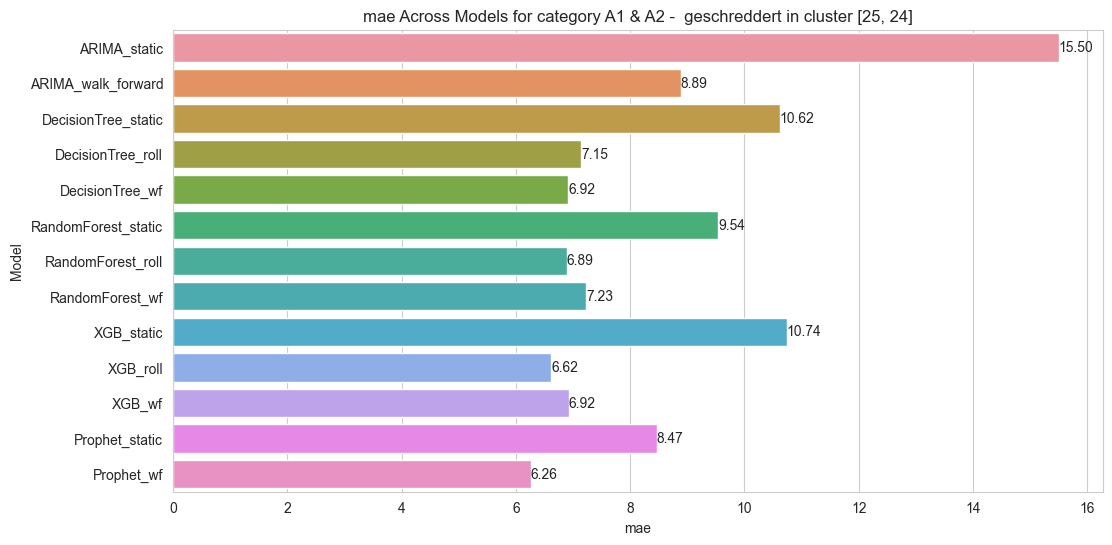

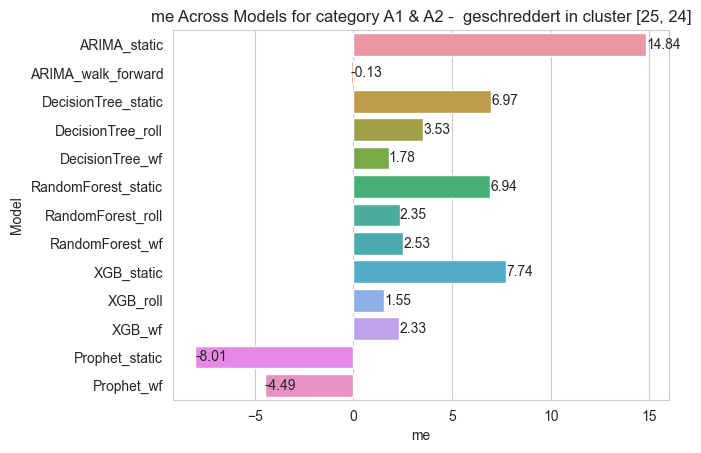

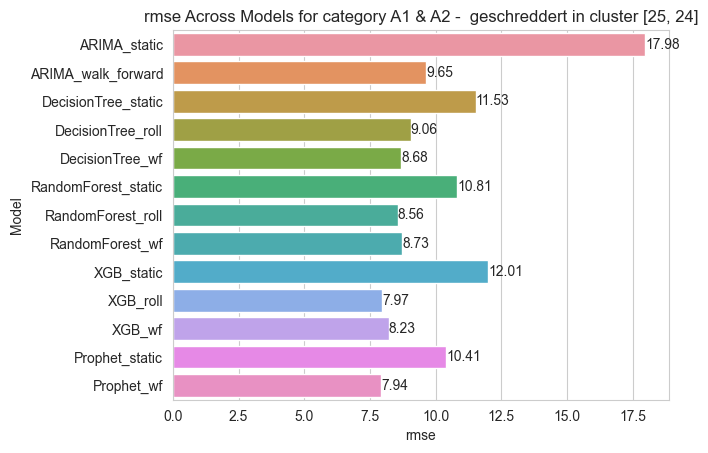

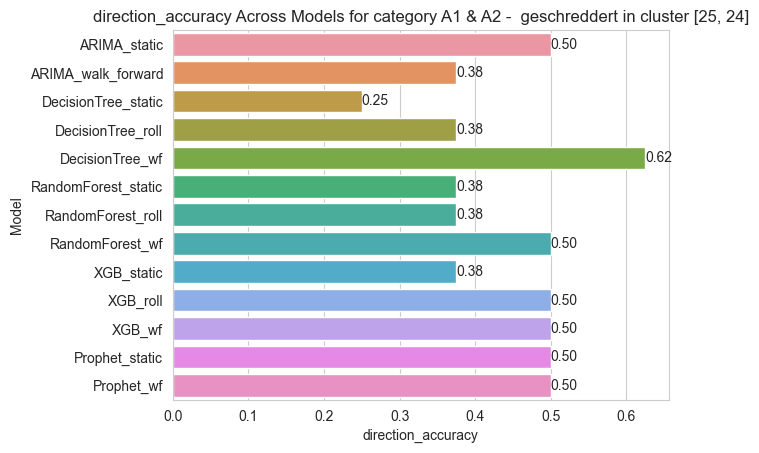

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Loop through each metric
for metric in ['mae', 'me', 'rmse', 'direction_accuracy']:
    # Plot the metric for each model
    sns.barplot(data=combined_df, x=metric, y='Model')

    # Add text labels next to the bars
    for index, value in enumerate(combined_df[metric]):
        plt.text(value, index, f'{value:.2f}', va='center')  # Add text with 2 decimal places

    plt.title(f'{metric} Across Models for category A1 & A2 -  geschreddert in cluster [25, 24]')
    plt.xlabel(metric)
    plt.ylabel('Model')
    plt.show()  # Show each plot separately

['ARIMA_results', 'ARIMA_static', 'ARIMA_walk_forward', 'DTresults', 'DecisionTree_roll', 'DecisionTree_static', 'DecisionTree_wf', 'ProphetResults', 'Prophet_static', 'Prophet_wf', 'RFresults', 'RandomForest_roll', 'RandomForest_static', 'RandomForest_wf', 'XGB_roll', 'XGB_static', 'XGB_wf', 'XGBresults', '_', '_10', '_11', '_12', '_13', '_14', '_15', '_17', '_18', '_23', '_24', '_25', '_26', '_27', '_28', '_29', '_3', '_30', '_31', '_32', '_33', '_34', '_35', '_37', '_38', '_4', '_5', '_6', '_7', '_8', '_9', '__', '___', 'combined_df', 'df_cleaned', 'series_lines_by_character_df', 'series_lines_clean_df', 'series_lines_raw_df']

In [60]:
ARIMA_results.head()

,Cluster,Category,ARIMA_static_mae,ARIMA_static_me,ARIMA_static_rmse,ARIMA_static_direction_accuracy,ARIMA_wf_mae,ARIMA_wf_me,ARIMA_wf_rmse,ARIMA_wf_direction_accuracy
0,"['25', '24']",A2 - geschreddert,20.949294,20.572508,23.891897,0.375000,7.621205,0.308027,8.566792,0.375000
1,"['25', '24']",A1 & A2 - geschreddert,15.497086,14.843453,17.982535,0.500000,8.888828,-0.133571,9.651584,0.375000
2,"['25', '24']",A2 & A3 - geschreddert,23.508696,23.035530,26.096929,0.375000,6.971959,0.845032,8.431148,0.375000
3,"['80', '81', '82', '83', '84', '85', '93', '94']",A3 - geschreddert,3.107817,3.107817,3.558327,0.750000,1.638604,-0.073119,1.983720,0.375000
4,"['80', '81', '82', '83', '84', '85', '93', '94']",A1 & A2 - geschreddert,7.187167,7.187167,9.094353,0.714286,4.032012,0.656495,6.008303,0.428571


In [66]:
DTresults.columns 

Index(['Cluster', 'Category', 'DecisionTree_static_mae',
       'DecisionTree_static_me', 'DecisionTree_static_rmse',
       'DecisionTree_static_direction_accuracy', 'DecisionTree_rolling_mae',
       'DecisionTree_rolling_me', 'DecisionTree_rolling_rmse',
       'DecisionTree_rolling_direction_accuracy', 'DecisionTree_wf_mae',
       'DecisionTree_wf_me', 'DecisionTree_wf_rmse',
       'DecisionTree_wf_direction_accuracy'],
      dtype='object')

In [67]:
RFresults.columns

Index(['Cluster', 'Category', 'RandomForest_static_mae',
       'RandomForest_static_me', 'RandomForest_static_rmse',
       'RandomForest_static_direction_accuracy', 'RandomForest_rolling_mae',
       'RandomForest_rolling_me', 'RandomForest_rolling_rmse',
       'RandomForest_rolling_direction_accuracy', 'RandomForest_wf_mae',
       'RandomForest_wf_me', 'RandomForest_wf_rmse',
       'RandomForest_wf_direction_accuracy'],
      dtype='object')

In [68]:
XGBresults.columns

Index(['Cluster', 'Category', 'XGB_mae', 'XGB_static_me', 'XGB_static_rmse',
       'XGB_static_direction_accuracy', 'XGB_rolling_mae', 'XGB_rolling_me',
       'XGB_rolling_rmse', 'XGB_rolling_direction_accuracy', 'XGB_wf_mae',
       'XGB_wf_me', 'XGB_wf_rmse', 'XGB_wf_direction_accuracy'],
      dtype='object')

In [69]:
ProphetResults.columns

Index(['Cluster', 'Category', 'Prophet_static_mae', 'Prophet_static_me',
       'Prophet_static_rmse', 'Prophet_static_direction_accuracy',
       'Prophet_wf_mae', 'Prophet_wf_me', 'Prophet_wf_rmse',
       'Prophet_wf_direction_accuracy'],
      dtype='object')

In [71]:
# Extracting the required columns from each dataframe
df1_cols = ARIMA_results[['Cluster', 'Category','ARIMA_static_rmse', 'ARIMA_static_direction_accuracy','ARIMA_wf_rmse','ARIMA_wf_direction_accuracy']]
df2_cols = DTresults[['DecisionTree_static_rmse','DecisionTree_static_direction_accuracy', 'DecisionTree_rolling_rmse', 'DecisionTree_rolling_direction_accuracy','DecisionTree_wf_rmse','DecisionTree_wf_direction_accuracy']]
df3_cols = RFresults[['RandomForest_static_rmse','RandomForest_static_direction_accuracy', 'RandomForest_rolling_rmse', 'RandomForest_rolling_direction_accuracy', 'RandomForest_wf_mae','RandomForest_wf_rmse', 'RandomForest_wf_direction_accuracy']]
df4_cols = XGBresults[['XGB_static_rmse', 'XGB_static_direction_accuracy', 'XGB_rolling_rmse', 'XGB_rolling_direction_accuracy', 'XGB_wf_rmse', 'XGB_wf_direction_accuracy']]
df5_cols = ProphetResults[['Prophet_static_rmse', 'Prophet_static_direction_accuracy', 'Prophet_wf_rmse','Prophet_wf_direction_accuracy']]




In [72]:
# Concatenating the extracted columns into a new dataframe
final_df = pd.concat([df1_cols, df2_cols, df3_cols, df4_cols, df5_cols], axis=1)
final_df

,Cluster,Category,ARIMA_static_rmse,ARIMA_static_direction_accuracy,ARIMA_wf_rmse,ARIMA_wf_direction_accuracy,DecisionTree_static_rmse,DecisionTree_static_direction_accuracy,DecisionTree_rolling_rmse,DecisionTree_rolling_direction_accuracy,...,XGB_static_rmse,XGB_static_direction_accuracy,XGB_rolling_rmse,XGB_rolling_direction_accuracy,XGB_wf_rmse,XGB_wf_direction_accuracy,Prophet_static_rmse,Prophet_static_direction_accuracy,Prophet_wf_rmse,Prophet_wf_direction_accuracy
0,"['25', '24']",A2 - geschreddert,23.891897,0.375000,8.566792,0.375000,16.821615,0.125000,8.892096,0.250000,...,13.355618,0.500000,8.173904,0.375000,9.392138,0.125000,15.337345,0.625000,7.198100,0.625000
1,"['25', '24']",A1 & A2 - geschreddert,17.982535,0.500000,9.651584,0.375000,11.533878,0.250000,9.056628,0.375000,...,12.012174,0.375000,7.974943,0.500000,8.226339,0.500000,10.414400,0.500000,7.939459,0.500000
2,"['25', '24']",A2 & A3 - geschreddert,26.096929,0.375000,8.431148,0.375000,21.089813,0.500000,9.184332,0.000000,...,15.503235,0.500000,8.634626,0.500000,9.073827,0.000000,13.292845,0.625000,6.358306,0.625000
3,"['80', '81', '82', '83', '84', '85', '93', '94']",A3 - geschreddert,3.558327,0.750000,1.983720,0.375000,6.256285,0.500000,6.407914,0.125000,...,6.425054,0.375000,3.200623,0.125000,2.491482,0.375000,4.616745,0.250000,4.161088,0.250000
4,"['80', '81', '82', '83', '84', '85', '93', '94']",A1 & A2 - geschreddert,9.094353,0.714286,6.008303,0.428571,5.087265,0.428571,5.823981,0.000000,...,4.528356,0.142857,8.043274,0.571429,9.264566,0.714286,7.415716,0.428571,5.855179,0.428571
5,"['80', '81', '82', '83', '84', '85', '93', '94']",A2 & A3 - geschreddert,4.771942,0.500000,2.830340,0.375000,4.411833,0.250000,5.844125,0.125000,...,5.193994,0.875000,3.213507,0.500000,2.762730,0.500000,4.447597,0.500000,3.923101,0.500000
6,"['70', '71', '73', '74', '75', '76']",A2 & A3 - geschreddert,28.226276,0.428571,5.277081,0.285714,9.115511,0.714286,4.574086,0.000000,...,11.752462,0.285714,8.314400,0.571429,6.165807,0.714286,7.413996,0.571429,5.041052,0.571429
7,"['50', '51', '52', '53']",A2 & A3 - geschreddert,2.440977,0.125000,3.387406,0.125000,4.255749,0.250000,2.749806,0.000000,...,3.583860,0.375000,3.542225,0.250000,3.295258,0.625000,9.403652,0.500000,5.817503,0.500000
8,"['50', '51', '52', '53']",A3 - geschreddert,9.049607,0.500000,4.171241,0.125000,3.017870,0.375000,3.620516,0.000000,...,2.739939,0.750000,3.698310,0.875000,3.911566,0.750000,12.083938,0.500000,5.909462,0.500000
9,"['40', '41', '42', '44', '45', '46', '47']",A2 & A3 - ungeschreddert,2.727215,0.375000,2.483509,0.250000,3.978805,0.125000,2.178637,0.000000,...,2.246490,0.375000,2.822124,0.250000,2.960655,0.250000,3.723064,0.500000,2.389287,0.625000


In [74]:
rmse_columns = ['ARIMA_static_rmse', 'ARIMA_wf_rmse',
                'DecisionTree_static_rmse', 'DecisionTree_rolling_rmse', 'DecisionTree_wf_rmse',
                'RandomForest_static_rmse', 'RandomForest_rolling_rmse', 'RandomForest_wf_rmse',
                'XGB_static_rmse', 'XGB_rolling_rmse', 'XGB_wf_rmse',
                'Prophet_static_rmse', 'Prophet_wf_rmse']

# Step 2: Find the RMSE column with the minimum value for each row
final_df['min_rmse'] = final_df[rmse_columns].idxmin(axis=1)

# Step 3: Count the occurrences of each RMSE column being the minimum
min_rmse_counts = final_df['min_rmse'].value_counts()

# Step 4: Calculate the percentage
total_rows = len(final_df)
min_rmse_percentage = (min_rmse_counts / total_rows) * 100

# Display the percentages
min_rmse_percentage = min_rmse_percentage.reset_index()
min_rmse_percentage.columns = ['RMSE Variable', 'Percentage of Rows with Lowest RMSE']

min_rmse_percentage

,RMSE Variable,Percentage of Rows with Lowest RMSE
0,ARIMA_wf_rmse,21.212121
1,DecisionTree_rolling_rmse,15.151515
2,Prophet_wf_rmse,12.121212
3,RandomForest_static_rmse,12.121212
4,RandomForest_rolling_rmse,9.090909
5,ARIMA_static_rmse,6.060606
6,DecisionTree_wf_rmse,6.060606
7,DecisionTree_static_rmse,6.060606
8,XGB_static_rmse,3.030303
9,XGB_wf_rmse,3.030303


In [75]:
rmse_columns = ['ARIMA_static_rmse', 'ARIMA_wf_rmse',
                'DecisionTree_static_rmse', 'DecisionTree_rolling_rmse', 'DecisionTree_wf_rmse',
                'RandomForest_static_rmse', 'RandomForest_rolling_rmse', 'RandomForest_wf_rmse',
                'XGB_static_rmse', 'XGB_rolling_rmse', 'XGB_wf_rmse',
                'Prophet_static_rmse', 'Prophet_wf_rmse']

# Step 2: Find the RMSE column with the minimum value for each row
final_df['min_rmse'] = final_df[rmse_columns].idxmin(axis=1)

# Step 3: Count the occurrences of each RMSE column being the minimum
min_rmse_counts = final_df['min_rmse'].value_counts()

# Step 4: Calculate the percentage
total_rows = len(final_df)
#min_rmse_percentage = (min_rmse_counts / total_rows) * 100

# Display the percentages
min_rmse_counts = min_rmse_counts.reset_index()
min_rmse_counts.columns = ['RMSE Variable', 'No. of Rows with Lowest RMSE']

min_rmse_counts

,RMSE Variable,No. of Rows with Lowest RMSE
0,ARIMA_wf_rmse,7
1,DecisionTree_rolling_rmse,5
2,Prophet_wf_rmse,4
3,RandomForest_static_rmse,4
4,RandomForest_rolling_rmse,3
5,ARIMA_static_rmse,2
6,DecisionTree_wf_rmse,2
7,DecisionTree_static_rmse,2
8,XGB_static_rmse,1
9,XGB_wf_rmse,1
